In [1]:
import pandas as pd

earthquake = pd.read_csv('earthquake.csv')
earthquake[['time','updated']] = earthquake[['time','updated']].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%dT%H:%M:%S.%fZ'))

In [2]:
pd.set_option('display.max_columns', None)
earthquake

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2024-01-18 02:18:19.690,38.807835,-122.823334,2.03,1.49,md,21.0,54.0,0.004681,0.02,nc,nc73990876,2024-01-18 02:19:54.732,"7 km WNW of The Geysers, CA",earthquake,0.22,0.310,0.150,22.0,automatic,nc,nc
1,2024-01-18 02:16:52.710,38.808498,-122.823669,2.01,1.33,md,23.0,53.0,0.004320,0.02,nc,nc73990871,2024-01-18 02:28:11.196,"7 km WNW of The Geysers, CA",earthquake,0.19,0.340,0.140,23.0,automatic,nc,nc
2,2024-01-18 01:55:45.006,64.994500,-147.409700,5.20,1.50,ml,NaN,NaN,NaN,0.60,ak,ak024tslkck,2024-01-18 02:03:52.136,"10 km ENE of Fox, Alaska",earthquake,NaN,0.300,NaN,NaN,automatic,ak,ak
3,2024-01-18 01:48:21.130,36.020333,-117.781167,1.55,1.39,ml,27.0,62.0,0.013780,0.16,ci,ci40461911,2024-01-18 01:54:25.834,"15 km NE of Little Lake, CA",earthquake,0.17,0.160,0.139,11.0,automatic,ci,ci
4,2024-01-18 01:46:32.440,38.826668,-122.853836,2.44,0.28,md,10.0,99.0,0.002529,0.01,nc,nc73990856,2024-01-18 02:04:12.038,"10 km WNW of The Geysers, CA",earthquake,0.40,1.070,0.160,11.0,automatic,nc,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8881,2023-12-19 02:43:10.876,-7.242500,119.138700,593.76,4.90,mb,95.0,26.0,2.074000,0.75,us,us7000ljz0,2024-01-16 01:30:21.040,"142 km NNE of Bima, Indonesia",earthquake,3.86,6.268,0.054,107.0,reviewed,us,us
8882,2023-12-19 02:42:29.472,-22.785000,172.366200,10.00,5.30,mww,64.0,74.0,4.546000,0.74,us,us7000ljz1,2024-01-15 23:45:16.040,southeast of the Loyalty Islands,earthquake,10.15,1.808,0.075,17.0,reviewed,us,us
8883,2023-12-19 02:39:21.180,33.111333,-115.624833,9.51,1.34,ml,32.0,93.0,0.066410,0.19,ci,ci40447495,2023-12-19 15:49:01.616,"8 km N of Westmorland, CA",earthquake,0.21,0.520,0.214,20.0,reviewed,ci,ci
8884,2023-12-19 02:35:17.230,38.826332,-122.804833,3.06,0.64,md,8.0,147.0,0.005036,0.01,nc,nc73977961,2023-12-19 04:50:10.666,"7 km NW of The Geysers, CA",earthquake,1.08,1.470,0.120,7.0,automatic,nc,nc


In [75]:
from shapely.geometry import Point
import geopandas as gpd

geometry = [Point(xy) for xy in zip(earthquake.longitude, earthquake.latitude)]
gdf = gpd.GeoDataFrame(earthquake, geometry=geometry)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\sasha\AppData\Local\Temp\ipykernel_27952\4241510330.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


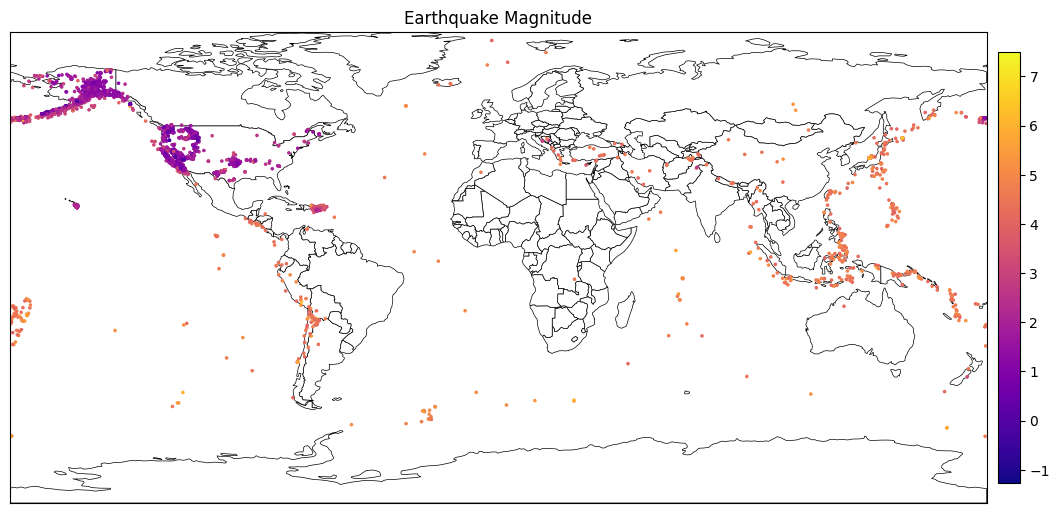

In [250]:
import matplotlib.pyplot as plt
import seaborn as sns

base = world.plot(figsize=(15,7), color='white', edgecolor='black', linewidth=0.5)
gdf.plot(ax=base, column='mag', cmap='plasma', marker='.', markersize=10, legend=True, legend_kwds={'pad':0.01, 'shrink': 0.8})
plt.title('Earthquake Magnitude')
plt.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
plt.margins(0)
plt.show()

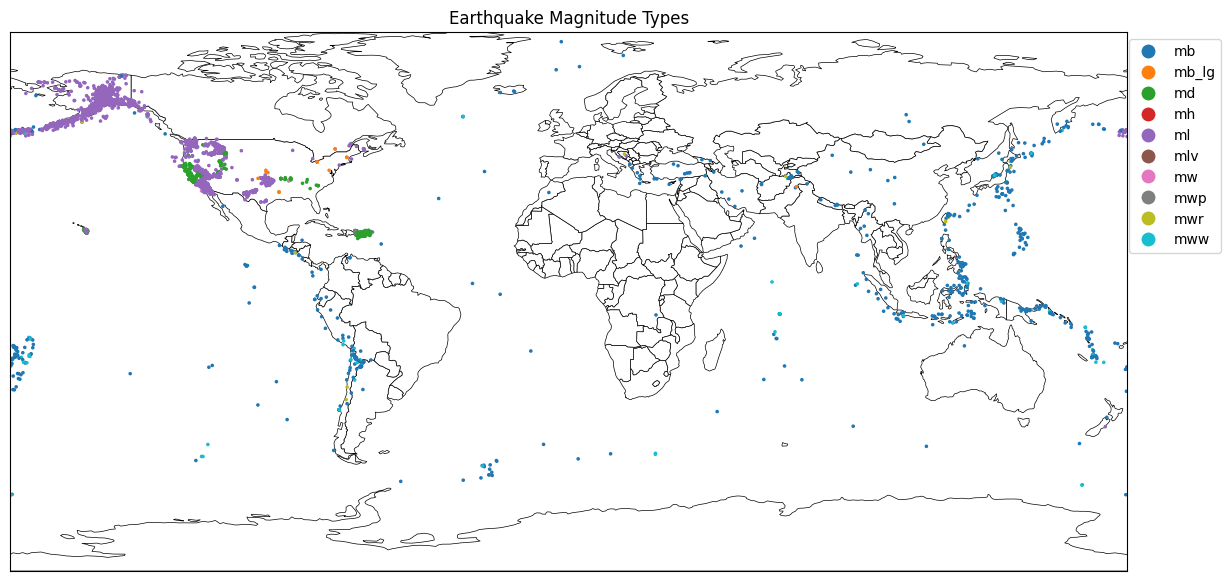

In [297]:
from matplotlib.colors import ListedColormap

base = world.plot(figsize=(15,7), color='white', edgecolor='black', linewidth=0.5)  
new_cmap = ListedColormap(['tab:blue', 'tab:orange', 'tab:green', 'tab:red'])
gdf.plot(ax=base, column='magType', label=gdf.magType, cmap='tab10', marker='.', markersize=10, legend=True, legend_kwds={'bbox_to_anchor': (1.09,1), 'loc': 'upper right'})
plt.title('Earthquake Magnitude Types')
plt.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
plt.margins(0)
plt.show()

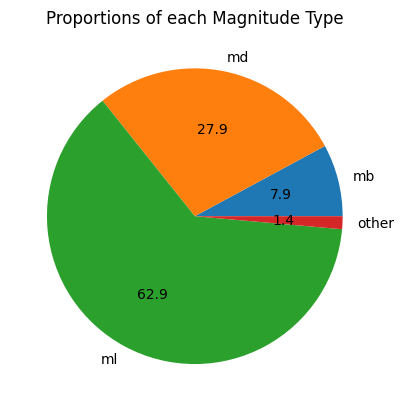

In [314]:
magType_values = gdf.magType.value_counts()
other = pd.Series([magType_values[3:].sum()], index=['other'])
pie_data = magType_values[:3].add(other, fill_value=0)
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f')
plt.title('Proportions of each Magnitude Type')
plt.show()

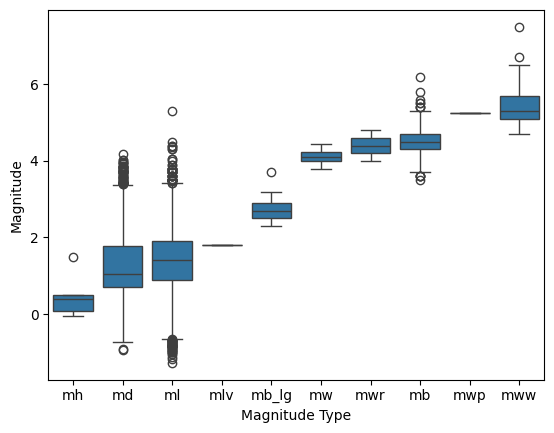

In [317]:
sns.boxplot(x=gdf.magType, y=gdf.mag, order=['mh', 'md', 'ml', 'mlv', 'mb_lg', 'mw', 'mwr', 'mb', 'mwp', 'mww'])
plt.xlabel('Magnitude Type')
plt.ylabel('Magnitude')
plt.show()

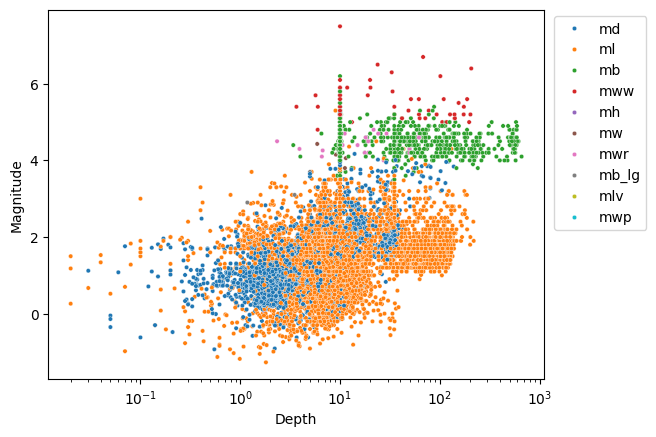

In [319]:
sns.scatterplot(gdf, x='depth', y='mag', s=10, hue='magType')
plt.legend(loc='upper right', bbox_to_anchor=(1.22,1))
plt.xscale('log')
plt.xlabel('Depth')
plt.ylabel('Magnitude')
plt.show()

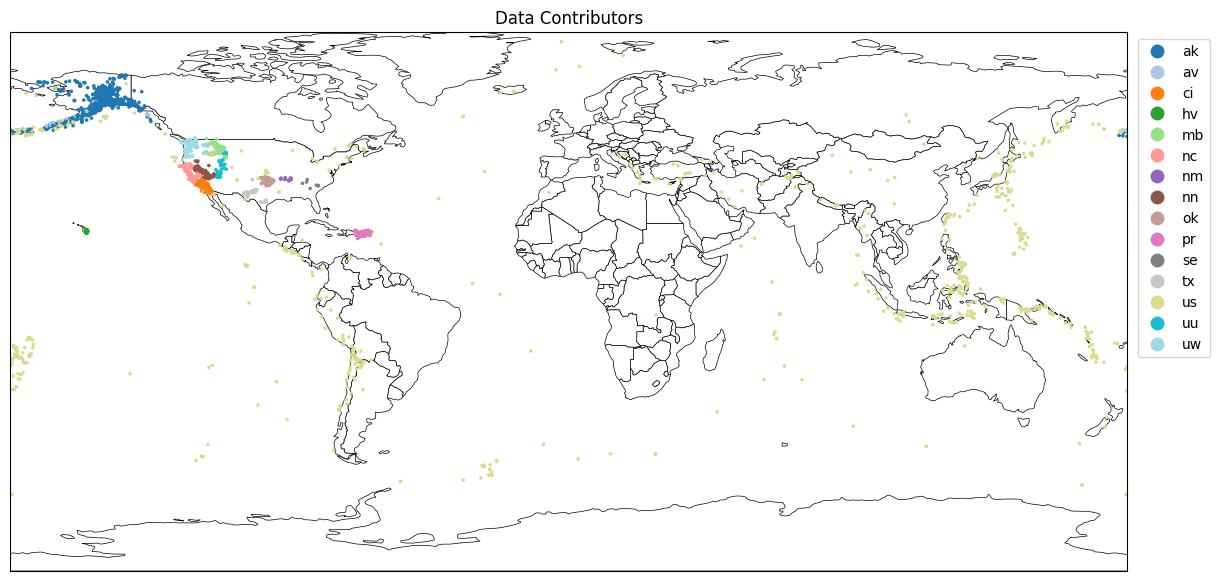

In [307]:
base = world.plot(figsize=(15,7), color='white', edgecolor='black', linewidth=0.5)  
gdf.plot(ax=base, column='net', label=gdf.net, cmap='tab20', marker='.', markersize=10, legend=True, legend_kwds={'bbox_to_anchor': (1.08,1), 'loc': 'upper right'})
plt.title('Data Contributors')
plt.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
plt.margins(0)
plt.show()

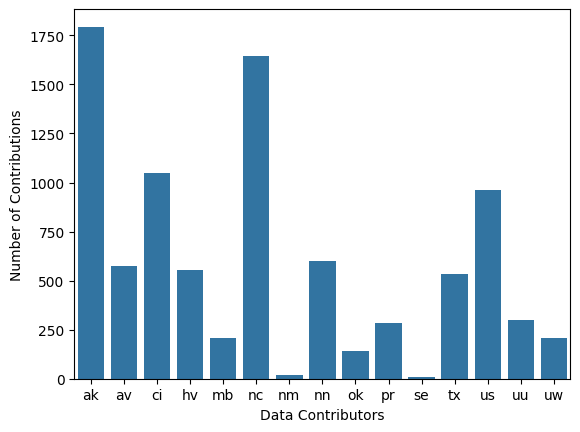

In [310]:
import numpy as np
order = np.sort(earthquake.net.unique())
sns.countplot(earthquake, x='net', order=order)
plt.xlabel('Data Contributors')
plt.ylabel('Number of Contributions')
plt.show()

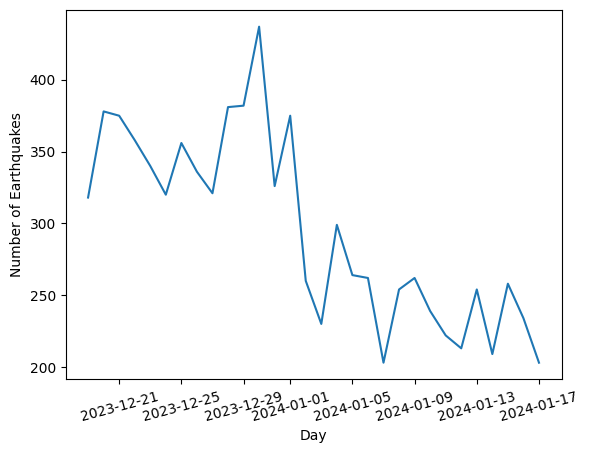

In [316]:
daily_earthquakes = earthquake.groupby(pd.Grouper(key='time', freq='d')).count().reset_index()[0:-1]
plt.plot(daily_earthquakes.time, daily_earthquakes.latitude)
plt.xticks(rotation=15)
plt.xlabel('Day')
plt.ylabel('Number of Earthquakes')
plt.show()